## Assignment A1b: Functions and Computation

In [1]:
# Appropriate Libraries:
import math
import numpy as np
import matplotlib.pyplot as plt

### 1. Common functions

### 1a. `sinewave`

In [2]:
def sinewave(t, f=1.0, d=0.0):
    if(type(t)==list):
        t = np.array(t)
    phi = 2 * np.pi * d * f
    return np.sin(2 * np.pi * f * t + phi)

A quick graph:

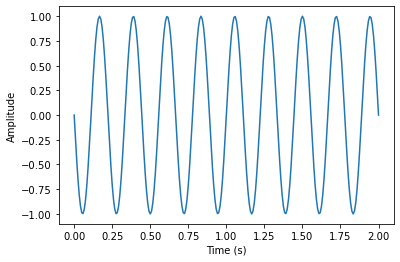

In [3]:
t_120Hz = np.linspace(0,2,num=120*2+1) # 120Hz denotes sampling rate
sine_vals = sinewave(t_120Hz, f=4.5, d= 1.0)
plt.plot(t_120Hz, sine_vals)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

#### 1)
Formula: 

$\text{time}\times f_{s} = i$

Unit Analysis:

$\text{seconds} \times \text{Hz}= \text{seconds} \times \frac{\text{samples}}{\text{second}}= \text{samples}$

#### 2)
Formula:

$\text{delay} \times f_{s} \times 2\pi = \text{phase} = \phi$

Unit Analysis:

$\text{seconds} \times \frac{\text{cycles}}{\text{second}} \times \frac{\text{radians}}{\text{second}} = \text{radians}$


### 1b. `gabor`

In [4]:
def gabor (t, a=1.0, sigma:int=1, f = 1.0, phi = 0.0):
    return a * np.exp((-t**2)/(2 * (sigma**2))) * np.cos(2*np.pi*f*t+phi)

def gabore (t, a=1.0, sigma:int=1, f = 1.0):
    return gabor(t, a, sigma, f=f, phi=0.0)

def gaboro (t, a=1.0, sigma:int=1, f = 1.0):
    return gabor(t, a, sigma, f=f, phi=(np.pi/2))   

In [5]:
def gabor_norm(sample_f, sigma:int=1, f=1.0, phi=0.0):
    t = np.linspace(1/sample_f, sigma/f, num=sigma*sample_f-1)
    max_amplitude = 0
    for t_val in t:
        gabor_val = gabor(t_val, sigma=sigma, f=f, phi=phi)
        if abs(gabor_val) > max_amplitude:
            max_amplitude = abs(gabor_val)
    return 1/max_amplitude

def gabore_norm(sample_f, sigma:int=1, f=1.0, phi=0.0):
    t = np.linspace(1/sample_f, sigma/f, num=sigma*sample_f-1)
    max_amplitude = 0
    for t_val in t:
        gabor_val = gabore(t_val, sigma=sigma, f=f)
        if abs(gabor_val) > max_amplitude:
            max_amplitude = abs(gabor_val)
    return 1/max_amplitude  

def gaboro_norm(sample_f, sigma:int=1, f=1.0, phi=0.0):
    t = np.linspace(1/sample_f, sigma/f, num=sigma*sample_f-1)
    max_amplitude = 0
    for t_val in t:
        gabor_val = gaboro(t_val, sigma=sigma, f=f)
        if abs(gabor_val) > max_amplitude:
            max_amplitude = abs(gabor_val)
    return 1/max_amplitude  

### 1c. `gammatone`

In [6]:
def gammatone (t, n:int=4, f=1.0, phi=0.0):
    if(type(t)==list):
        t = np.array(t)
    b = 1.019*(24.7*(((4.37*f)/1000) + 1))
    gamma_value = (t**(n-1))*np.exp(-2*np.pi*b*t)*np.cos(2*np.pi*f*t + phi)
    return gamma_value / np.amax(gamma_value)


A quick graph:

In [7]:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
gammatone_vals = gammatone(t_20000Hz, f=4000.0)

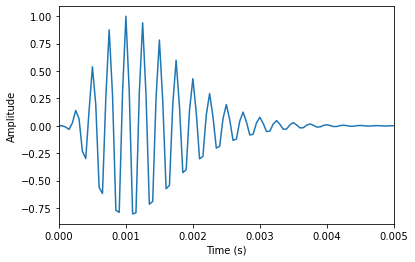

In [8]:
plt.plot(t_20000Hz, gammatone_vals)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.xlim((0, 0.005))
plt.show()

### 2. Simple computation

### 2a. `localmaxima`|

In [9]:
def localmaxima(data):
    local_maxima_indices = []
    for i in range(len(data)):
        if i != 0 and i != len(data)-1:
            if data[i-1] < data[i] and data[i] > data[i+1]:
                local_maxima_indices.append(i)
    return local_maxima_indices

An illustrative graph:

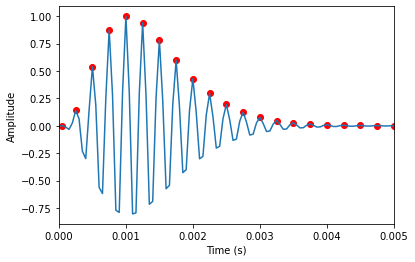

In [10]:
# First getting the local maxima so I can graph them:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
gammatone_vals = gammatone(t_20000Hz, f=4000.0)

local_maxima_indices = localmaxima(gammatone_vals)
local_maxima_times = []
local_maxima_values = []
for index in local_maxima_indices:
    local_maxima_times.append(t_20000Hz[index])
    local_maxima_values.append(gammatone_vals[index])

plt.plot(t_20000Hz, gammatone_vals)
plt.scatter(local_maxima_times, local_maxima_values, c='#ff0000')
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.xlim((0, 0.005))
plt.show()

### 2b. `crossings`


In [11]:
def crossings (data, threshold, dir:str="both"):
    crossings_indices = []
    for i in range(len(data)):
        if i != 0:
            if data[i] >= threshold and data[i-1] < threshold:
                if dir == "both" or dir == "negpos":
                    crossings_indices.append(i)
            elif data[i] <= threshold and data[i-1] > threshold:
                if dir == "both" or dir == "posneg":
                    crossings_indices.append(i)
    return crossings_indices

A graph:

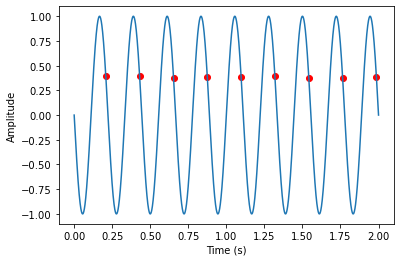

In [12]:
t_1000Hz = np.linspace(0,2,num=1000*2+1) # 120Hz denotes sampling rate
sine_vals = sinewave(t_1000Hz, f=4.5, d= 1.0)

crossings_indices = crossings(sine_vals, 0.4, dir="posneg")
crossings_times = []
crossings_vals = []
for index in crossings_indices:
    crossings_times.append(t_1000Hz[index])
    crossings_vals.append(sine_vals[index])

plt.plot(t_1000Hz, sine_vals)
plt.scatter(crossings_times, crossings_vals, c="#ff0000")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

### 2c. `envelope`

In [13]:
def envelope(y, nblocks):
    num_samples_per_block = math.ceil(len(y)/nblocks)
    block_indices = []
    i = 0
    y_lower = y[i]
    y_upper = y[i]
    while i < len(y):
        block_indices.append(i)
        if y[i] > y_upper:
            y_upper = y[i]
        if y[i] < y_lower:
            y_lower = y[i]
        i += num_samples_per_block
    return y_lower, y_upper, block_indices
